In [1]:
import matplotlib.pyplot as plt
import numpy as np
import heapq

In [2]:
def orthogonal(upper,cmap):
    orthogonal_step_cost=1
    condition=False
    if ((upper[0,0]>=0) & (upper[1,0]>=0) & (upper[0,0] <=(cmap.shape[0]-1)) & (upper[1,0] <= (cmap.shape[1]-1))):
        if cmap[upper[0,0],upper[1,0]]!=1:
            condition=True
            return(condition,[upper,orthogonal_step_cost])
        else:
            return(condition,[upper,orthogonal_step_cost])
    else:
        return(condition,[upper,orthogonal_step_cost])

In [3]:
def diagonal(upper,cmap):
    diagonal_step_cost=1.414
    condition=False
    if ((upper[0,0]>=0) & (upper[1,0]>=0) & (upper[0,0] <=(cmap.shape[0]-1)) & (upper[1,0] <= (cmap.shape[1]-1))):
        if cmap[upper[0,0],upper[1,0]]!=1:
            condition=True
            return(condition,[upper,diagonal_step_cost])
        else:
            return(condition,[upper,diagonal_step_cost])
    else:
        return(condition,[upper,diagonal_step_cost])

In [4]:
def ValidNeighbours(node,cmap):
    neighbours=[]
    diagonal_step_cost=1.414
    orthogonal_step_cost=1
    
    
    upper=np.array([node[0,0]-1,node[1,0]]).reshape(2,1)
    upper_left=np.array([node[0,0]-1,node[1,0]-1]).reshape(2,1)
    upper_right=np.array([node[0,0]-1,node[1,0]+1]).reshape(2,1)
    left=np.array([node[0,0],node[1,0]-1]).reshape(2,1)
    right=np.array([node[0,0],node[1,0]+1]).reshape(2,1)
    lower=np.array([node[0,0]+1,node[1,0]]).reshape(2,1)
    lower_left=np.array([node[0,0]+1,node[1,0]-1]).reshape(2,1)
    lower_right=np.array([node[0,0]+1,node[1,0]+1]).reshape(2,1)
    
    nodes=[upper,left,right,lower]
    nodes_diagonal=[upper_left,upper_right,lower_left,lower_right]
    
    for node in nodes:
        condition,x = orthogonal(node,cmap)
        if condition==True:
            neighbours.append(x)
        else:
            continue
            
    for node in nodes_diagonal:
        condition,x=diagonal(node,cmap)
        if condition==True:
            neighbours.append(x)
        else:
            continue
            
            
    return(neighbours)
    

In [5]:
grid = np.array([

    [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0],

    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],

    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],

    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],

    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

start = np.array([0,0]).reshape(2,1)
goal = np.array([0,19]).reshape(2,1)


In [6]:
def dijkstra(start,goal,cmap):
    open_list=[]
    closed_list=[]
    g_cost_dict=dict()
    parents=dict()
    shortest_path=[]
    g_cost_dict[str(start)]=0
    open_list.append([start,g_cost_dict[str(start)]])
    path_found=False
    
    
    while open_list:
        
        open_list.sort(key= lambda x : x[1])
        
        current_node= open_list.pop(0)[0]
        
        if (current_node == goal).all():
            print("PATH FOUND")
            path_found=True
            break
            
        closed_list.append(current_node)
 
        
        neighbours=ValidNeighbours(current_node,cmap)

        for neighbour,step_cost in neighbours:
            
            if (neighbour == np.array(closed_list)).all():
                continue
                    
            g_cost=g_cost_dict[str(current_node)]+step_cost
            

            in_open_list = False
            
            for idx, element in enumerate(open_list):
                if (element[0] == neighbour).all():
                    in_open_list = True
                    break
                    
            if in_open_list==True:
                if g_cost < g_cost_dict[str(neighbour)]:
                    g_cost_dict[str(neighbour)]=g_cost
                    parents[str(neighbour)]= current_node
                    open_list[idx][1]==g_cost

                    
            else:
                g_cost_dict[str(neighbour)]=g_cost
                parents[str(neighbour)]=current_node
                open_list.append([neighbour,g_cost])

    if path_found==False:
        print("NO PATH FOUND")

    if path_found==True:
        node=goal
        shortest_path.append(node)
        node=parents[str(node)]
        while (node!=start).all():
            shortest_path.append(node)
            node= parents[str(node)]

    shortest_path=shortest_path[::-1]
    return(shortest_path,parents)

In [7]:
shortest_path,parents= dijkstra(start,goal,grid)

PATH FOUND


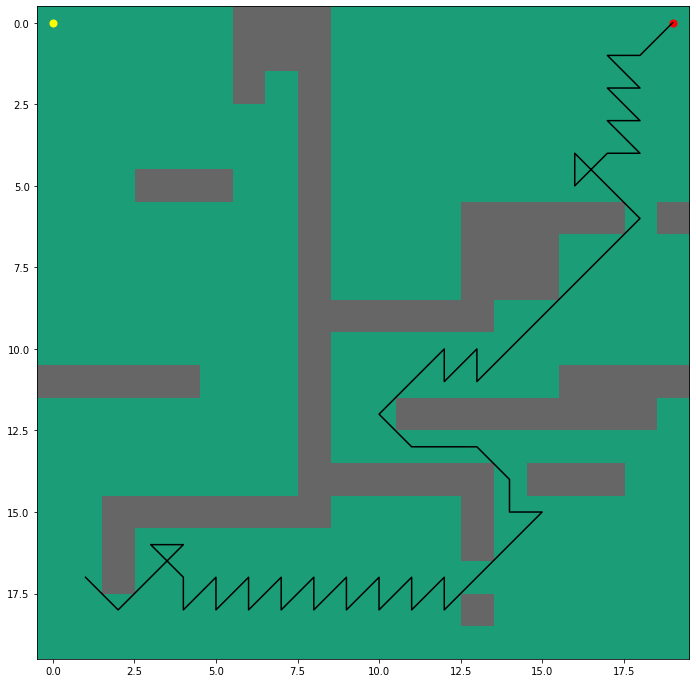

In [10]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(start[1],start[0], marker = ".", color = "yellow", s = 200)
ax.scatter(goal[1],goal[0], marker = ".", color = "red", s = 200)

y_cords=[]
x_cords=[]
for element in shortest_path:
    y_cords.append(element[1][0])
    x_cords.append(element[0][0])


ax.plot(y_cords,x_cords, color = "black")
plt.show()

In [9]:
open_heap=[]
node1=(4,3)
node2=(5,3)
node1_g_cost=3
node2_g_cost=6
heapq.heappush(open_heap,[node1_g_cost,node1])
heapq.heappush(open_heap,[node2_g_cost,node2])

print(open_heap)

node= heapq.heappop(open_heap)[1]
print(open_heap)
print(node)

open_heap[0]=[3,(4,1)]
print(open_heap)

[[3, (4, 3)], [6, (5, 3)]]
[[6, (5, 3)]]
(4, 3)
[[3, (4, 1)]]
